In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Read from JSON file

In [11]:
df_desktop = pd.read_json('/content/drive/MyDrive/AUT 2023/DATA 512/academy_monthly_desktop_201507-202309.json',convert_dates=False)
df_desktop.head()

,project,article,granularity,timestamp,agent,views
0,en.wikipedia,12_Years_a_Slave_(film),monthly,2015070100,user,62693
1,en.wikipedia,12_Years_a_Slave_(film),monthly,2015080100,user,58902
2,en.wikipedia,12_Years_a_Slave_(film),monthly,2015090100,user,59116
3,en.wikipedia,12_Years_a_Slave_(film),monthly,2015100100,user,65535
4,en.wikipedia,12_Years_a_Slave_(film),monthly,2015110100,user,66646


Q1: To get movies with maximum and minimum average page views:

First, we group data by article, calculate mean views for each article.

Then find the min and the max from the same

In [27]:
df_d_g = df_desktop.groupby('article').mean()
df_d_g[df_d_g['views']==df_d_g['views'].max()]

<ipython-input-27-565f28906093>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_d_g = df_desktop.groupby('article').mean()


,timestamp,views
article,,
Joker_(2019_film),2.020685e+09,216853.253968


In [28]:
df_d_g[df_d_g['views']==df_d_g['views'].min()]

,timestamp,views
article,,
Project_Hope_(film),2.019187e+09,36.616162


For desktop view, the article with maximum average page view is "Joker", and minimum average page view article is "Project Hope".

Hence, filter df to get time series for these articles only. Fix timestamping too.

In [59]:
df_desktop_min_max = df_desktop[(df_desktop['article']=="Joker_(2019_film)") | (df_desktop['article']=="Project_Hope_(film)")]
df_desktop_min_max['timestamp'] = pd.to_datetime(df_desktop_min_max['timestamp'],format='%Y%m%d%H')
desk_max = df_desktop_min_max[df_desktop_min_max['article']=="Joker_(2019_film)"]
desk_min = df_desktop_min_max[df_desktop_min_max['article']=="Project_Hope_(film)"]
x_desk_max = desk_max['timestamp']
y_desk_max = desk_max['views']
x_desk_min = desk_min['timestamp']
y_desk_min = desk_min['views']

<ipython-input-59-60392b1c87dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desktop_min_max['timestamp'] = pd.to_datetime(df_desktop_min_max['timestamp'],format='%Y%m%d%H')


Repeat the same process for mobile data

In [119]:
df_mobile = pd.read_json('/content/drive/MyDrive/AUT 2023/DATA 512/academy_monthly_mobile_201507-202309.json',convert_dates=False)
df_mobile.head()

,project,article,granularity,timestamp,agent,views
0,en.wikipedia,12_Years_a_Slave_(film),monthly,2015070100000,user,75458
1,en.wikipedia,12_Years_a_Slave_(film),monthly,2015080100000,user,64091
2,en.wikipedia,12_Years_a_Slave_(film),monthly,2015090100000,user,53916
3,en.wikipedia,12_Years_a_Slave_(film),monthly,2015100100000,user,61688
4,en.wikipedia,12_Years_a_Slave_(film),monthly,2015110100000,user,61671


In [29]:
df_m_g = df_mobile.groupby('article').mean()
df_m_g[df_m_g['views']==df_m_g['views'].max()]

<ipython-input-29-aef7e6996dbd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_m_g = df_mobile.groupby('article').mean()


,timestamp,views
article,,
The_Whale_(2022_film),2.022668e+12,525412.866667


In [30]:
df_d_g[df_d_g['views']==df_d_g['views'].min()]

,timestamp,views
article,,
Project_Hope_(film),2.019187e+09,36.616162


For mobile data, "The Whale" has highest average page view and "Project Hope" has lowest.

In [64]:
df_mobile_min_max = df_mobile[(df_mobile['article']=="The_Whale_(2022_film)") | (df_mobile['article']=="Project_Hope_(film)")]
times = list(df_mobile_min_max['timestamp'])
for i in range(len(times)):
  times[i] = int(times[i]/100000)
df_mobile_min_max['timestamp'] = times
df_mobile_min_max['timestamp'] = pd.to_datetime(df_mobile_min_max['timestamp'],format='%Y%m%d')
mob_max = df_mobile_min_max[df_mobile_min_max['article']=="The_Whale_(2022_film)"]
mob_min = df_mobile_min_max[df_mobile_min_max['article']=="Project_Hope_(film)"]
x_mob_max = mob_max['timestamp']
y_mob_max = mob_max['views']
x_mob_min = mob_min['timestamp']
y_mob_min = mob_min['views']

<ipython-input-64-df63385319e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile_min_max['timestamp'] = times
<ipython-input-64-df63385319e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile_min_max['timestamp'] = pd.to_datetime(df_mobile_min_max['timestamp'],format='%Y%m%d')


Plot the timeseries! Now, as high value views and low value views are of vastly different scale, we can use logarithmic scaling to represent data on same axes scale.

We also use different colors for different lines

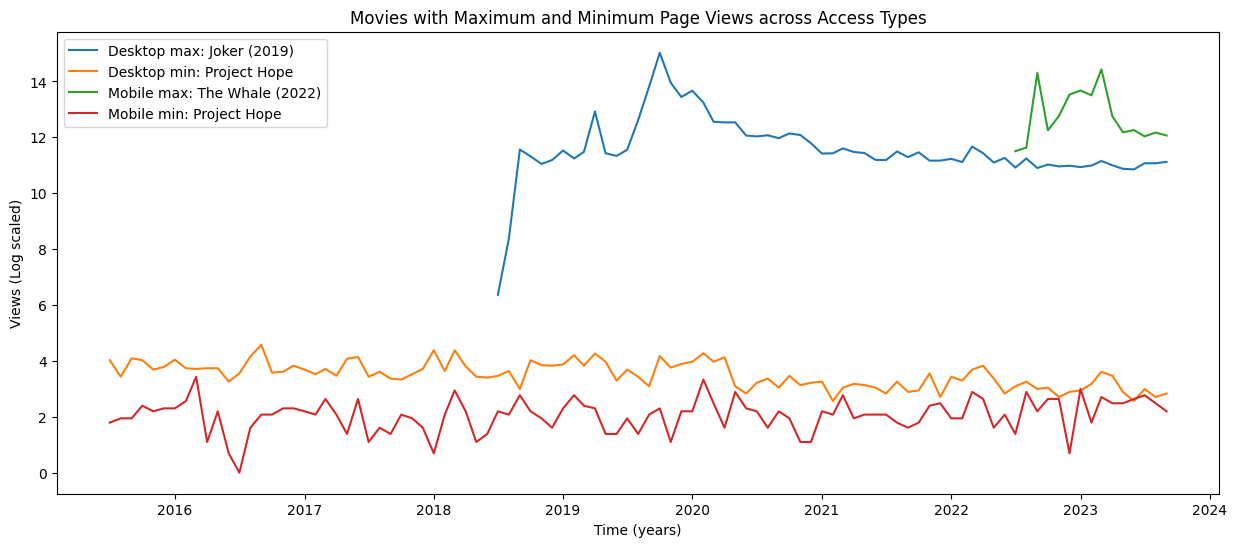

In [147]:
import numpy as np
plt.figure(figsize=(15,6))
plt.plot(x_desk_max,np.log(y_desk_max),label="Desktop max: Joker (2019)")
plt.plot(x_desk_min,np.log(y_desk_min),label="Desktop min: Project Hope")
plt.plot(x_mob_max,np.log(y_mob_max),label="Mobile max: The Whale (2022)")
plt.plot(x_mob_min,np.log(y_mob_min),label="Mobile min: Project Hope")
plt.xlabel("Time (years)")
plt.ylabel("Views (Log scaled)")
plt.title("Movies with Maximum and Minimum Page Views across Access Types")
plt.legend()
plt.savefig('/content/drive/MyDrive/AUT 2023/DATA 512/Max & Min Average.png')
plt.show()

Q2: To get top 10 articles for each access types with highest monthly page view values

We group the dataframe by article and select the month with maximum pageview value for each movie. Then sort these in a descending order and select top 10.

In [84]:
df_desk_max = df_desktop.groupby(by='article').max()
desk_10_max = df_desk_max[['views']].sort_values(by='views',ascending=False).head(10)
desk_10_max

,views
article,
Joker_(2019_film),3355060
Parasite_(2019_film),2813357
Black_Panther_(film),2659906
The_Revenant_(2015_film),2165430
Avatar:_The_Way_of_Water,1890048
Spectre_(2015_film),1812832
Dune_(2021_film),1694498
1917_(2019_film),1567798
Tenet_(film),1565634


In [113]:
df_desktop['timestamp'] = pd.to_datetime(df_desktop['timestamp'],format='%Y%m%d%H')

Manually filtering for these 10 articles

In [144]:
dx1 = df_desktop[df_desktop['article']=='Joker_(2019_film)']['timestamp']
dx2 = df_desktop[df_desktop['article']=='Parasite_(2019_film)']['timestamp']
dx3 = df_desktop[df_desktop['article']=='Black_Panther_(film)']['timestamp']
dx4 = df_desktop[df_desktop['article']=='The_Revenant_(2015_film)']['timestamp']
dx5 = df_desktop[df_desktop['article']=='Avatar:_The_Way_of_Water']['timestamp']
dx6 = df_desktop[df_desktop['article']=='Spectre_(2015_film)']['timestamp']
dx7 = df_desktop[df_desktop['article']=='Dune_(2021_film)']['timestamp']
dx8 = df_desktop[df_desktop['article']=='1917_(2019_film)']['timestamp']
dx9 = df_desktop[df_desktop['article']=='Tenet_(film)']['timestamp']
dx10 = df_desktop[df_desktop['article']=='Blade_Runner_2049']['timestamp']

dy1 = df_desktop[df_desktop['article']=='Joker_(2019_film)']['views']
dy2 = df_desktop[df_desktop['article']=='Parasite_(2019_film)']['views']
dy3 = df_desktop[df_desktop['article']=='Black_Panther_(film)']['views']
dy4 = df_desktop[df_desktop['article']=='The_Revenant_(2015_film)']['views']
dy5 = df_desktop[df_desktop['article']=='Avatar:_The_Way_of_Water']['views']
dy6 = df_desktop[df_desktop['article']=='Spectre_(2015_film)']['views']
dy7 = df_desktop[df_desktop['article']=='Dune_(2021_film)']['views']
dy8 = df_desktop[df_desktop['article']=='1917_(2019_film)']['views']
dy9 = df_desktop[df_desktop['article']=='Tenet_(film)']['views']
dy10 = df_desktop[df_desktop['article']=='Blade_Runner_2049']['views']

Repeat the same process for mobile data

In [85]:
df_mob_max = df_mobile.groupby(by='article').max()
mob_10_max = df_mob_max[['views']].sort_values(by='views',ascending=False).head(10)
mob_10_max

,views
article,
Avatar:_The_Way_of_Water,8106378
Joker_(2019_film),8047344
Black_Panther_(film),5503665
Parasite_(2019_film),5484956
Black_Panther:_Wakanda_Forever,4634986
RRR_(film),4114488
Dune_(2021_film),3956760
The_Revenant_(2015_film),3802421
Top_Gun:_Maverick,3784632


In [120]:
times = list(df_mobile['timestamp'])
for i in range(len(times)):
  times[i] = int(times[i]/100000)
df_mobile['timestamp'] = times
df_mobile['timestamp'] = pd.to_datetime(df_mobile['timestamp'],format='%Y%m%d')

In [145]:
mx1 = df_mobile[df_mobile['article']=='Avatar:_The_Way_of_Water']['timestamp']
mx2 = df_mobile[df_mobile['article']=='Joker_(2019_film)']['timestamp']
mx3 = df_mobile[df_mobile['article']=='Black_Panther_(film)']['timestamp']
mx4 = df_mobile[df_mobile['article']=='Parasite_(2019_film)']['timestamp']
mx5 = df_mobile[df_mobile['article']=='Black_Panther:_Wakanda_Forever']['timestamp']
mx6 = df_mobile[df_mobile['article']=='RRR_(film)']['timestamp']
mx7 = df_mobile[df_mobile['article']=='Dune_(2021_film)']['timestamp']
mx8 = df_mobile[df_mobile['article']=='The_Revenant_(2015_film)']['timestamp']
mx9 = df_mobile[df_mobile['article']=='Top_Gun:_Maverick']['timestamp']
mx10 = df_mobile[df_mobile['article']=='Everything_Everywhere_All_at_Once	']['timestamp']

my1 = df_mobile[df_mobile['article']=='Avatar:_The_Way_of_Water']['views']
my2 = df_mobile[df_mobile['article']=='Joker_(2019_film)']['views']
my3 = df_mobile[df_mobile['article']=='Black_Panther_(film)']['views']
my4 = df_mobile[df_mobile['article']=='Parasite_(2019_film)']['views']
my5 = df_mobile[df_mobile['article']=='Black_Panther:_Wakanda_Forever']['views']
my6 = df_mobile[df_mobile['article']=='RRR_(film)']['views']
my7 = df_mobile[df_mobile['article']=='Dune_(2021_film)']['views']
my8 = df_mobile[df_mobile['article']=='The_Revenant_(2015_film)']['views']
my9 = df_mobile[df_mobile['article']=='Top_Gun:_Maverick']['views']
my10 = df_mobile[df_mobile['article']=='Everything_Everywhere_All_at_Once	']['views']

Plot the timeseries! Similar to the first graph, use logarithmic scaling to represent all time ranges on the same axes better, visually.

We use solid and dashed lines to distinguish desktop and mobile data, along with the different colored lines.

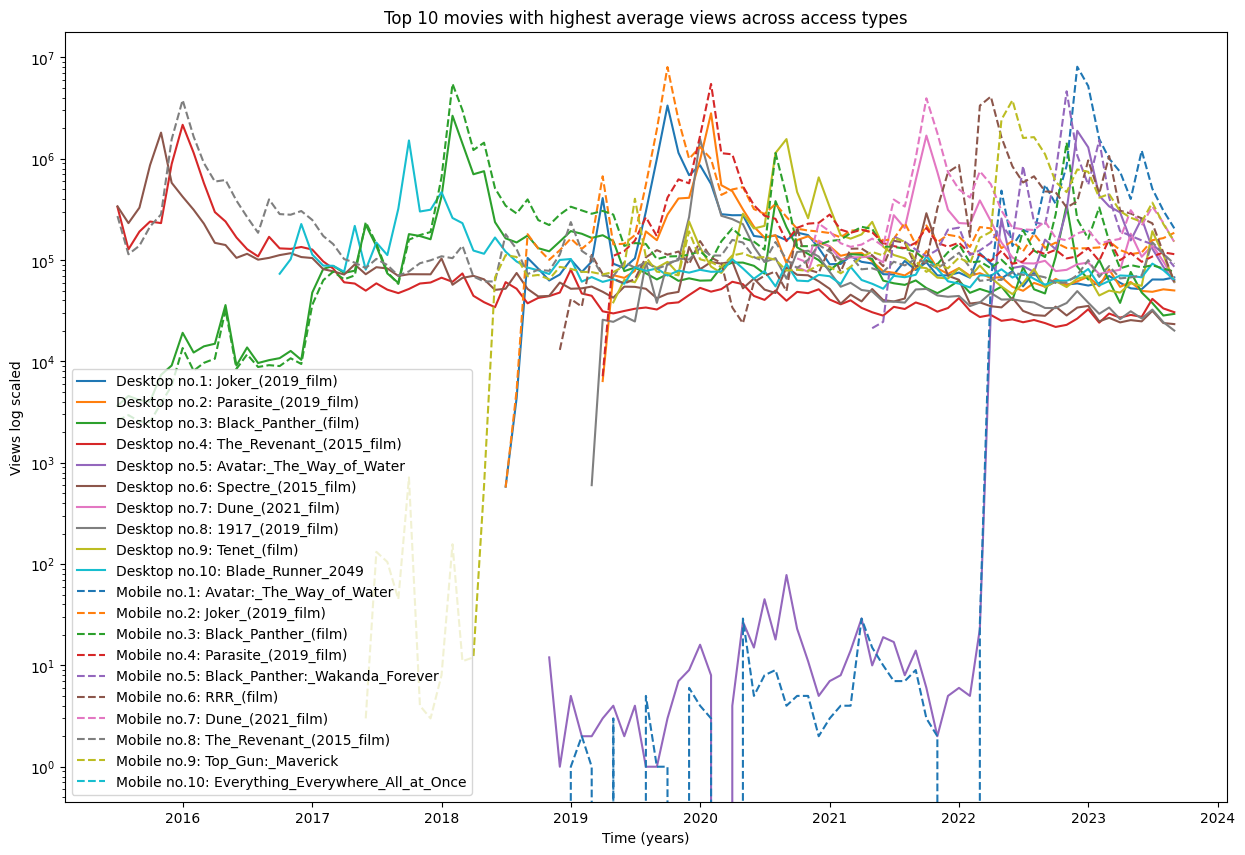

In [146]:
plt.figure(figsize=(15,10))
plt.plot(dx1,dy1,label="Desktop no.1: Joker_(2019_film)")
plt.plot(dx2,dy2,label="Desktop no.2: Parasite_(2019_film)")
plt.plot(dx3,dy3,label="Desktop no.3: Black_Panther_(film)")
plt.plot(dx4,dy4,label="Desktop no.4: The_Revenant_(2015_film)")
plt.plot(dx5,dy5,label="Desktop no.5: Avatar:_The_Way_of_Water")
plt.plot(dx6,dy6,label="Desktop no.6: Spectre_(2015_film)")
plt.plot(dx7,dy7,label="Desktop no.7: Dune_(2021_film)")
plt.plot(dx8,dy8,label="Desktop no.8: 1917_(2019_film)")
plt.plot(dx9,dy9,label="Desktop no.9: Tenet_(film)")
plt.plot(dx10,dy10,label="Desktop no.10: Blade_Runner_2049")

plt.plot(mx1,my1,label="Mobile no.1: Avatar:_The_Way_of_Water",linestyle="dashed")
plt.plot(mx2,my2,label="Mobile no.2: Joker_(2019_film)",linestyle="dashed")
plt.plot(mx3,my3,label="Mobile no.3: Black_Panther_(film)",linestyle="dashed")
plt.plot(mx4,my4,label="Mobile no.4: Parasite_(2019_film)",linestyle="dashed")
plt.plot(mx5,my5,label="Mobile no.5: Black_Panther:_Wakanda_Forever",linestyle="dashed")
plt.plot(mx6,my6,label="Mobile no.6: RRR_(film)",linestyle="dashed")
plt.plot(mx7,my7,label="Mobile no.7: Dune_(2021_film)",linestyle="dashed")
plt.plot(mx8,my8,label="Mobile no.8: The_Revenant_(2015_film)",linestyle="dashed")
plt.plot(mx9,my9,label="Mobile no.9: Top_Gun:_Maverick",linestyle="dashed")
plt.plot(mx10,my10,label="Mobile no.10: Everything_Everywhere_All_at_Once",linestyle="dashed")

plt.xlabel("Time (years)")
plt.ylabel("Views log scaled")
plt.yscale("log")
plt.title("Top 10 movies with highest average views across access types")
plt.legend()
plt.savefig('/content/drive/MyDrive/AUT 2023/DATA 512/Top 10 movies with highest average views.png')
plt.show()

Q3: To get top 10 articles for each access type with least amount of data available.

We group the dataframes by articles, and count the total number of occurrences of each article. Then sort the articles in ascending order of number of counts and select top 10.

In [139]:
desk_mindata = df_desktop.groupby(by='article').count().sort_values(by='views').head(10)
desk_mindata

,project,granularity,timestamp,agent,views
article,,,,,
"The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)",10,10,10,10,10
The_Elephant_Whisperers,10,10,10,10,10
Women_Talking_(film),11,11,11,11,11
Eskimo_(1933_film),12,12,12,12,12
The_Whale_(2022_film),15,15,15,15,15
The_Critic_(1963_film),15,15,15,15,15
The_Windshield_Wiper,20,20,20,20,20
The_Queen_of_Basketball,20,20,20,20,20
Navalny_(film),21,21,21,21,21


Filter for above acquired top 10 articles

In [149]:
dx1 = df_desktop[df_desktop['article']=='The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)	']['timestamp']
dx2 = df_desktop[df_desktop['article']=='The_Elephant_Whisperers']['timestamp']
dx3 = df_desktop[df_desktop['article']=='Women_Talking_(film)']['timestamp']
dx4 = df_desktop[df_desktop['article']=='Eskimo_(1933_film)']['timestamp']
dx5 = df_desktop[df_desktop['article']=='The_Whale_(2022_film)']['timestamp']
dx6 = df_desktop[df_desktop['article']=='The_Critic_(1963_film)']['timestamp']
dx7 = df_desktop[df_desktop['article']=='The_Windshield_Wiper']['timestamp']
dx8 = df_desktop[df_desktop['article']=='The_Queen_of_Basketball']['timestamp']
dx9 = df_desktop[df_desktop['article']=='Navalny_(film)']['timestamp']
dx10 = df_desktop[df_desktop['article']=='Guillermo_del_Toro\'s_Pinocchio']['timestamp']

dy1 = df_desktop[df_desktop['article']=='The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)	']['views']
dy2 = df_desktop[df_desktop['article']=='The_Elephant_Whisperers']['views']
dy3 = df_desktop[df_desktop['article']=='Women_Talking_(film)']['views']
dy4 = df_desktop[df_desktop['article']=='Eskimo_(1933_film)']['views']
dy5 = df_desktop[df_desktop['article']=='The_Whale_(2022_film)']['views']
dy6 = df_desktop[df_desktop['article']=='The_Critic_(1963_film)']['views']
dy7 = df_desktop[df_desktop['article']=='The_Windshield_Wiper']['views']
dy8 = df_desktop[df_desktop['article']=='The_Queen_of_Basketball']['views']
dy9 = df_desktop[df_desktop['article']=='Navalny_(film)']['views']
dy10 = df_desktop[df_desktop['article']=='Guillermo_del_Toro\'s_Pinocchio']['views']

Repeat the process for mobile data

In [138]:
mob_mindata = df_mobile.groupby(by='article').count().sort_values(by='views').head(10)
mob_mindata

,project,granularity,timestamp,agent,views
article,,,,,
"The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)",10,10,10,10,10
The_Elephant_Whisperers,10,10,10,10,10
Women_Talking_(film),11,11,11,11,11
Eskimo_(1933_film),12,12,12,12,12
The_Whale_(2022_film),15,15,15,15,15
The_Critic_(1963_film),15,15,15,15,15
The_Windshield_Wiper,20,20,20,20,20
The_Queen_of_Basketball,20,20,20,20,20
Navalny_(film),21,21,21,21,21


Filter for acquired movies

In [150]:
mx1 = df_mobile[df_mobile['article']=='The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)	']['timestamp']
mx2 = df_mobile[df_mobile['article']=='The_Elephant_Whisperers']['timestamp']
mx3 = df_mobile[df_mobile['article']=='Women_Talking_(film)']['timestamp']
mx4 = df_mobile[df_mobile['article']=='Eskimo_(1933_film)']['timestamp']
mx5 = df_mobile[df_mobile['article']=='The_Whale_(2022_film)']['timestamp']
mx6 = df_mobile[df_mobile['article']=='The_Critic_(1963_film)']['timestamp']
mx7 = df_mobile[df_mobile['article']=='The_Windshield_Wiper']['timestamp']
mx8 = df_mobile[df_mobile['article']=='The_Queen_of_Basketball']['timestamp']
mx9 = df_mobile[df_mobile['article']=='Navalny_(film)']['timestamp']
mx10 = df_mobile[df_mobile['article']=='Guillermo_del_Toro\'s_Pinocchio']['timestamp']

my1 = df_mobile[df_mobile['article']=='The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)	']['views']
my2 = df_mobile[df_mobile['article']=='The_Elephant_Whisperers']['views']
my3 = df_mobile[df_mobile['article']=='Women_Talking_(film)']['views']
my4 = df_mobile[df_mobile['article']=='Eskimo_(1933_film)']['views']
my5 = df_mobile[df_mobile['article']=='The_Whale_(2022_film)']['views']
my6 = df_mobile[df_mobile['article']=='The_Critic_(1963_film)']['views']
my7 = df_desktop[df_mobile['article']=='The_Windshield_Wiper']['views']
my8 = df_mobile[df_mobile['article']=='The_Queen_of_Basketball']['views']
my9 = df_mobile[df_mobile['article']=='Navalny_(film)']['views']
my10 = df_mobile[df_mobile['article']=='Guillermo_del_Toro\'s_Pinocchio']['views']

Plot the timeseries! once again, we use logarithmic scaling for uniformity (even though it makes the graph go wacky).

Solid lines represent desktop views, dashed lines show mobile views.

Interestingly, the set of movies for both desktop and mobile are exactly same and in the exact same order!

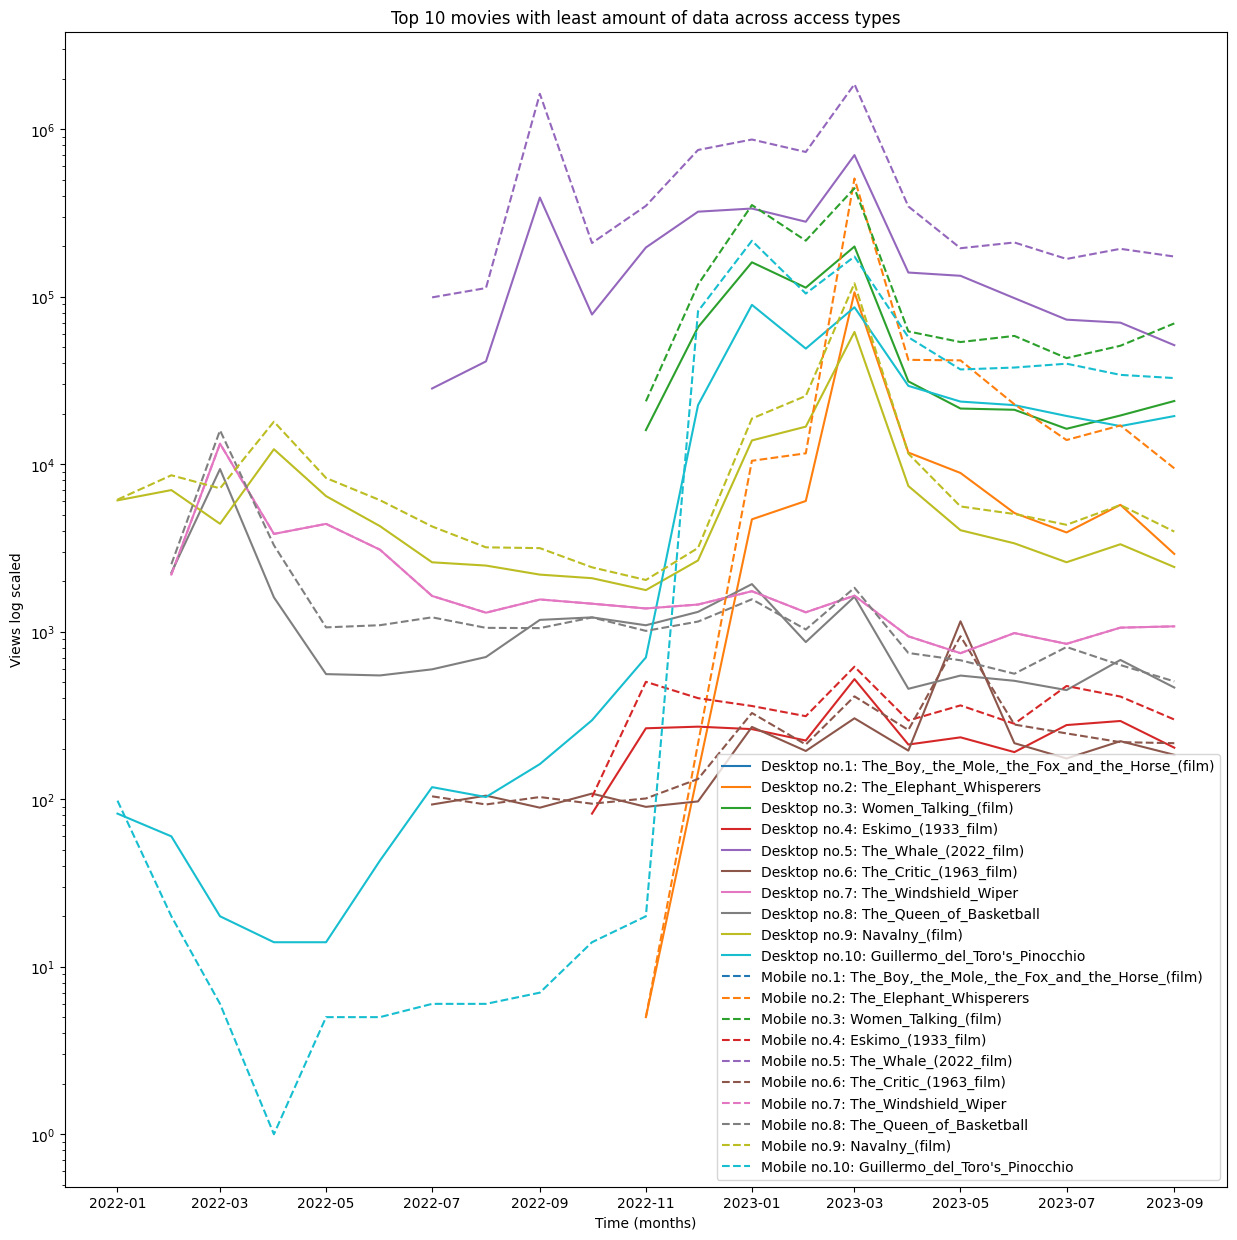

In [151]:
plt.figure(figsize=(15,15))
plt.plot(dx1,dy1,label="Desktop no.1: The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)")
plt.plot(dx2,dy2,label="Desktop no.2: The_Elephant_Whisperers")
plt.plot(dx3,dy3,label="Desktop no.3: Women_Talking_(film)")
plt.plot(dx4,dy4,label="Desktop no.4: Eskimo_(1933_film)")
plt.plot(dx5,dy5,label="Desktop no.5: The_Whale_(2022_film)")
plt.plot(dx6,dy6,label="Desktop no.6: The_Critic_(1963_film)")
plt.plot(dx7,dy7,label="Desktop no.7: The_Windshield_Wiper")
plt.plot(dx8,dy8,label="Desktop no.8: The_Queen_of_Basketball")
plt.plot(dx9,dy9,label="Desktop no.9: Navalny_(film)")
plt.plot(dx10,dy10,label="Desktop no.10: Guillermo_del_Toro\'s_Pinocchio")

plt.plot(mx1,my1,label="Mobile no.1: The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)",linestyle="dashed")
plt.plot(mx2,my2,label="Mobile no.2: The_Elephant_Whisperers",linestyle="dashed")
plt.plot(mx3,my3,label="Mobile no.3: Women_Talking_(film)",linestyle="dashed")
plt.plot(mx4,my4,label="Mobile no.4: Eskimo_(1933_film)",linestyle="dashed")
plt.plot(mx5,my5,label="Mobile no.5: The_Whale_(2022_film)",linestyle="dashed")
plt.plot(mx6,my6,label="Mobile no.6: The_Critic_(1963_film)",linestyle="dashed")
plt.plot(mx7,my7,label="Mobile no.7: The_Windshield_Wiper",linestyle="dashed")
plt.plot(mx8,my8,label="Mobile no.8: The_Queen_of_Basketball",linestyle="dashed")
plt.plot(mx9,my9,label="Mobile no.9: Navalny_(film)",linestyle="dashed")
plt.plot(mx10,my10,label="Mobile no.10: Guillermo_del_Toro\'s_Pinocchio",linestyle="dashed")

plt.xlabel("Time (months)")
plt.ylabel("Views log scaled")
plt.yscale("log")
plt.title("Top 10 movies with least amount of data across access types")
plt.legend()
plt.savefig('/content/drive/MyDrive/AUT 2023/DATA 512/Top 10 movies with least amount of data.png')
plt.show()